imNames ['dimer_i001', 'dimer_i002', 'dimer_i003', 'dimer_i004', 'dimer_i005']


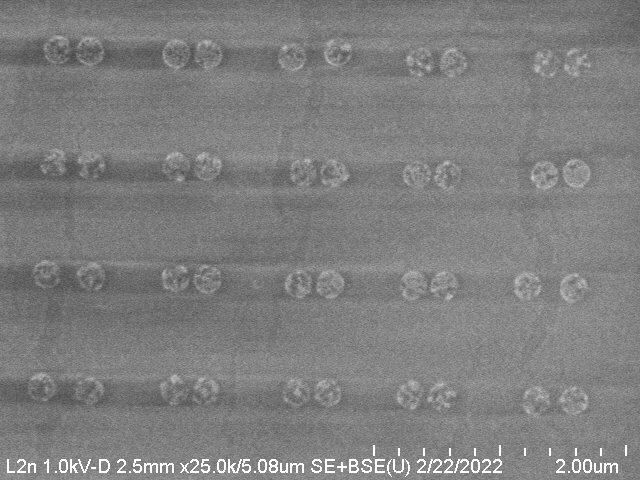

In [1]:
from utils4ImAnalysis import locateFileNameExt, blur_filter, L, edge_f, edge_detection
from PIL import Image, ImageFilter
Filters = [
            ImageFilter.BLUR,
            ImageFilter.CONTOUR,
            ImageFilter.DETAIL,
            ImageFilter.EDGE_ENHANCE,
            ImageFilter.EDGE_ENHANCE_MORE,
            ImageFilter.EMBOSS,
            ImageFilter.FIND_EDGES,
            ImageFilter.SHARPEN,
            ImageFilter.SMOOTH,
            ImageFilter.SMOOTH_MORE,
            ImageFilter.GaussianBlur,
            ImageFilter.MedianFilter,
            ImageFilter.MaxFilter,
            ImageFilter.MinFilter,
            ImageFilter.Kernel(
                                (3, 3),
                                (
                                    -1, -1, -1,
                                    -1,  8, -1, 
                                    -1, -1, -1
                                ),
                                1,
                                0
                            ),
            ImageFilter.BoxBlur(radius = 3),
            ImageFilter.UnsharpMask(radius=3, percent=150, threshold=3),
            ImageFilter.ModeFilter(size=3),
            # ImageFilter.Kernel(
            #                     (3, 3),
            #                     (
            #                         -0, -1, -0,
            #                         -1,  4, -1, 
            #                         -0, -1, -0,
            #                     ),
            #                     1,
            #                     0
            #                 ),


            # ImageFilter.RankFilter(size = size, rank = int(size**3 / (3*2))),
            ImageFilter.BoxBlur(radius = 0),
            # size – The kernel size, in pixels.
            # rank – What pixel value to pick.
            # Use 0 for a min filter,
            # size * size / 2 for a median filter,
            # size * size - 1 for a max filter, etc.
            # ImageFilter.Color3DLUT,
        ]
import matplotlib.pyplot as plt
import numpy as np
import os, sys

name:str = 'dimer_i00{}'.format(1)
imPaths = locateFileNameExt(containInName= "dimer_i00", ext=".jpg")
imNames = [imPath.split('\\')[-1].split('.')[0] for imPath in imPaths]
print('imNames', imNames)

im = Image.open(imPaths[2]); imArray = np.array(im)
nlines, ncolumns = imHeigh, imWidth = imWidth, imHeigh = im.size

imArrayCrop = imArray[:-35, :]

# plt.imshow(imArrayCrop)
im

# fig, axes = plt.subplots(2, 1, figsize=(15, 15))
# ax_crop =  axes[0]
# ax_metric = axes[1]
# ax_crop.imshow(imArrayCrop)
# ax_metric.imshow(imArrayMetric)

# plt.imshow(imArrayMetric)




# Metric calculation

In [2]:
# Metric calculation
startCol, stopCol = 373, 13 # 33 => 2#µm
shift, imageMetric = 0, 2 #µm

startCol, stopCol = 374, 241 # 33 => .2#µm
shift, imageMetric = 0, .2 #µm

imArrayMetric = imArray[-35:, int(startCol+shift):-int(stopCol+shift)]

def metricCoeff(imArrayMetric:np.array, horizontalMetric:bool = True, imageMetric:float = 2, powerOfTen:int = 3, nAfterComa:int = 3):
    # # pxlMetric = 7.937
    # # pxlMetric = 7.874
    coefTen, nPxl = eval(f'1e{powerOfTen}'), imArrayMetric.shape[int(horizontalMetric)]
    return round( imageMetric/nPxl*coefTen, nAfterComa )

pxlMetric = metricCoeff(imArrayMetric=imArrayMetric,
                        horizontalMetric=True,
                        imageMetric=imageMetric,
                        powerOfTen=3,
                        nAfterComa=3)
print(f'pxlMetric: {pxlMetric} nm')

pxlMetric: 8.0 nm


# filtering module 


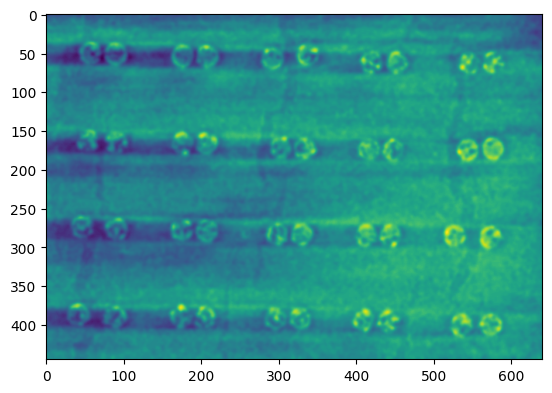

In [3]:

#filtering module 
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from scipy import ndimage as ndi

from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square

imArrayR = ndi.gaussian_filter(imArrayCrop, 2)
plt.imshow(Image.fromarray(imArrayR))


# imArrayR = convolve2d(imArray, ImageFilter.GaussianBlur, boundary='symm', mode='same')

# # Compute the Canny filter for two values of sigma
# edges1 = feature.canny(imArrayR)

# edges1 = feature.canny(imArrayR, sigma=1)
# plt.imshow(Image.fromarray(edges1))


# Salt paper filtering example

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0205736 

imNames = [
    'dimer_i001',
    'dimer_i002',
    'dimer_i003', 
    'dimer_i004',
    'dimer_i005'
]

<Figure size 640x480 with 0 Axes>

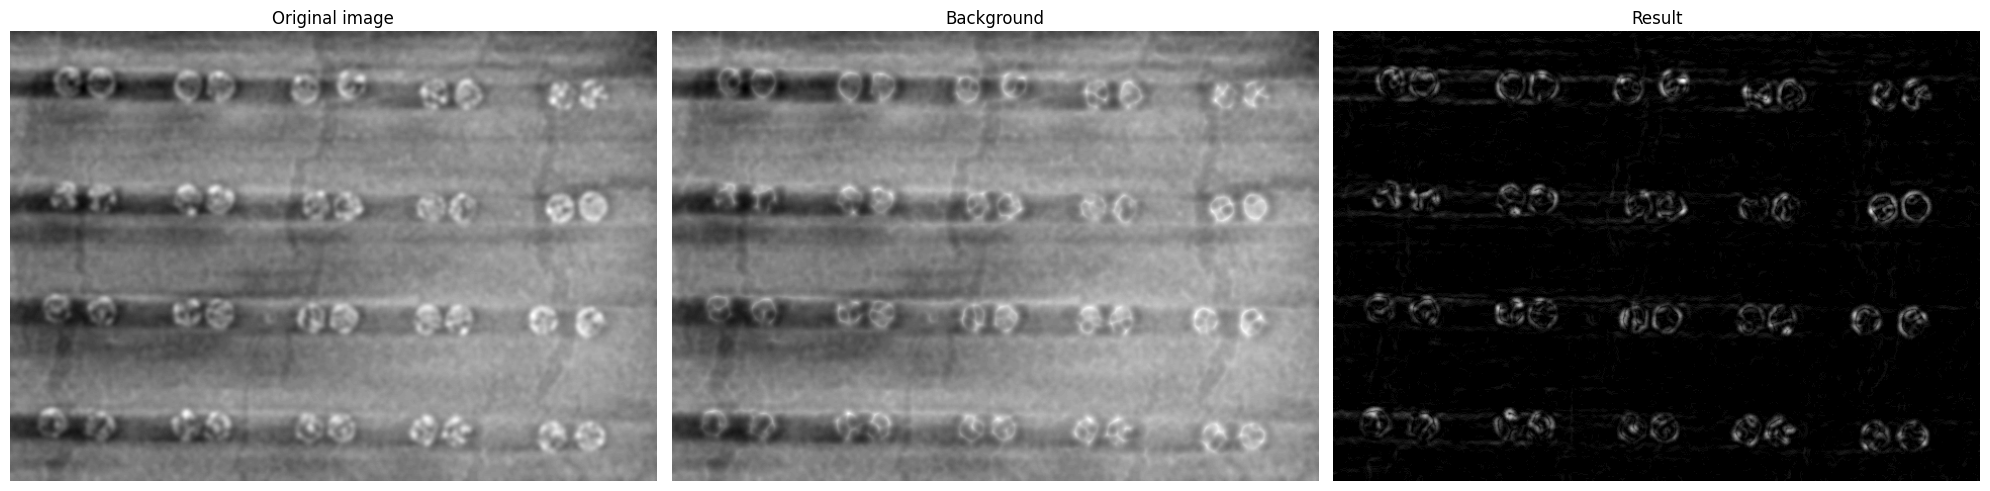

In [9]:
import imageio
import pywt
# https://pywavelets.readthedocs.io/en/latest/
from skimage import (
    data, restoration, util
)


def plot_result(image:np.array, background:np.array, figsize:tuple=(10,5)):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original image')
    ax[0].axis('off')

    ax[1].imshow(background, cmap='gray')
    ax[1].set_title('Background')
    ax[1].axis('off')

    ax[2].imshow(image - background, cmap='gray')
    ax[2].set_title('Result')
    ax[2].axis('off')

    fig.tight_layout()
#===============================================================================#

# #moche
# background = restoration.rolling_ball(
#     image=imArrayR
# )

#===============================================================================#
#beau
r1, r2, maxLoG = 20, 20, 255
r1, r2, maxLoG = 15, 15, 255
r1, r2, maxLoG = 25, 25, 255
r1, r2, maxLoG = 18, 18, 255
r1, r2, maxLoG = 22, 22, 255
ellipseKernel = restoration.ellipsoid_kernel(
    (r1, r2),
    maxLoG
)
background = restoration.rolling_ball(
    image=imArrayR,
    # image=imArrayCrop,
    kernel=ellipseKernel
)
#===============================================================================#
image=imArrayR
# image=imArrayCrop

imageResult = image - background
plt.figure(1)
plot_result(image, background, figsize=(20,10))
plt.savefig('rolling_ball.pdf')
plt.savefig('rolling_ball.png')


In [5]:
# r1, r2, maxLoG = 22, 22, 255
# ellipseKernel = restoration.ellipsoid_kernel(
#     (r1, r2),
#     maxLoG
# )
# for i in ellipseKernel:
#     if i == inf
# ellipseKernel = [ for i in ellipseKernel]
# conv = convolve2d(imArray, ellipseKernel, boundary='symm', mode='same')
# # imconv = Image.fromarray(conv)
# plt.imshow(conv)
# # imconv

#Exemple de détection d'ellipse

src : https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

https://programtalk.com/python-examples/skimage.measure.regionprops/

https://pyimagesearch.com/2016/02/08/opencv-shape-detection/



paper on shape detection:
https://www.researchgate.net/publication/360935951_Application_of_Python-OpenCV_to_detect_contour_of_shapes_and_colour_of_a_real_image

Realtime shape detection - cv2:
https://pysource.com/2018/12/29/real-time-shape-detection-opencv-with-python-3/

useless:

facedetection : https://realpython.com/traditional-face-detection-python/



filtre classique:
scharr
sobel



rolling-ball algorithm


détection bord :  
canny


l'algo sift:
Harris-stephens
Moravek

# Test algorithm for ellipses


In [6]:
# # src : https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops__.html

# import math
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from skimage.draw import ellipse
# from skimage.measure import label, regionprops, regionprops_table
# from skimage.transform import rotate


# image = np.zeros((600, 600))

# rr, cc = ellipse(300, 350, 100, 220)
# image[rr, cc] = 1

# image = rotate(image, angle=15, order=0)

# rr, cc = ellipse(100, 100, 60, 50)
# image[rr, cc] = 1

# label_img = label(image)
# regions = regionprops(label_img)
# fig, ax = plt.subplots()
# ax.imshow(image, cmap=plt.cm.gray)

# ellipse_properties = {'centers':[]}

# for props in regions:
#     y0, x0 = props.centroid
#     orientation = props.orientation
#     x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
#     y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
#     x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
#     y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

#     ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
#     ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
#     ax.plot(x0, y0, '.g', markersize=15)

#     minr, minc, maxr, maxc = props.bbox
#     bx = (minc, maxc, maxc, minc, minc)
#     by = (minr, minr, maxr, maxr, minr)
#     ax.plot(bx, by, '-b', linewidth=2.5)

# ax.axis((0, 600, 600, 0))
# plt.show()

# props = regionprops_table(label_img, properties=('centroid',
#                                                  'orientation',
#                                                  'axis_major_length',
#                                                  'axis_minor_length'))

# from IPython.display import display
# display(pd.DataFrame(props))




# Segmentation and Tracing

mask:  <class 'numpy.ndarray'>


,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length
0,43.620155,72.279070,-1.453709,76.768889,20.674822
1,37.730337,34.617978,-1.485588,21.938500,5.418576
3,41.915254,149.864407,-1.348727,31.167033,7.733060
5,46.841085,201.922481,-0.881743,31.635622,19.864395
6,50.825503,281.161074,-1.342283,35.659334,29.116628
...,...,...,...,...,...
73,400.616667,336.983333,-0.738738,18.644149,5.925099
74,400.015873,286.190476,0.855133,12.272052,7.366990
75,405.529412,414.529412,-0.956497,15.593999,7.470694
76,404.174603,446.650794,1.131401,10.149675,8.215691


9.887349249474623


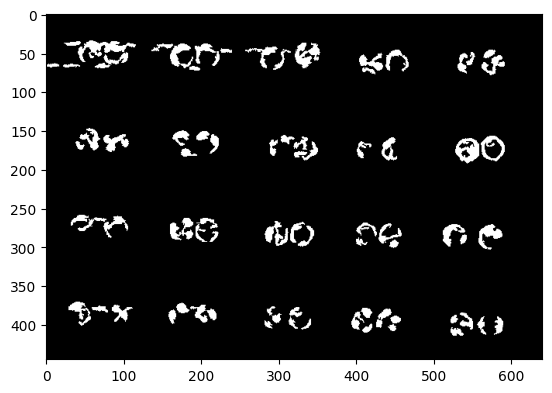

In [11]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = imageResult

# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)

# # Plot the mask
print('mask: ', type(mask))
plt.imshow(Image.fromarray(mask))

labels = measure.label(mask)

fig = px.imshow(imArrayCrop, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props_ = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
# for index in range(1, labels.max()):

indexs, elements = [i for i in range(labels.max())], [2, 4, 8, 18, 19, 20, 59]
for element in elements:
    indexs.remove(int(element-1))
del element
# del elements

for index in indexs:
    label_i = props_[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props_[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

#======================================================================================#
import pandas as pd
from IPython.display import display

# label_img = measure.label(img)
# regions = measure.regionprops(label_img, img)
# props = measure.regionprops_table(label_img, properties=(   
#                                                             'centroid',
#                                                             'orientation',
#                                                             'axis_major_length',
#                                                             'axis_minor_length'
#                                                         )
# )
# resultDf = pd.DataFrame(props)
# display(resultDf)

ssp = pd.DataFrame(measure.regionprops_table(labels, properties=(   
                                                            'centroid',
                                                            'orientation',
                                                            'axis_major_length',
                                                            'axis_minor_length'
                                                        ))).drop(elements, axis = 0)
display(ssp)

# index, prop_name = 8, 'centroid'
# index, prop_name = 8, 'orientation'
# index, prop_name = 8, 'axis_major_length'
index, prop_name = 8, 'axis_minor_length'
print(getattr(props_[index], prop_name))
#======================================================================================#
plotly.io.show(fig)
fig.write_image("plotly.png")
fig.write_image("plotly.pdf")
fig.write_html("deducedMasks.html")
plt.savefig('deducedMasks.pdf')
plt.savefig('deducedMasks.png')

# import kaleido
# fig.write_image('file.png')
# import pdfkit

# savePath = r'C:\Users\nicolas.casteleyn\Documents\ImageAnalysis\WilliamIm'

# pdfkit.from_file(os.path.join(savePath,'file.html'),os.path.join(savePath,'file.pdf'))


In [ ]:

selectedDisks = [28, 31]

frame = []
for selectedDisk in selectedDisks:
    frame.append(ssp.loc[(ssp.index==int(selectedDisk-1))])
selectedDisksFrame = pd.concat(frame)

display(selectedDisksFrame)

# display(ssp.iloc[[28,31]])
# display(ssp.loc[(ssp.index==elements)])
# print(elements[0])


,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length
27,171.342926,575.321343,0.534750,37.958948,35.859529
30,175.385502,544.296540,-1.319049,33.649805,32.673888


In [ ]:
# Enregistrement et calculs

# pxlMetric = imageMetric/imArrayMetricShape[0]*1e3
# print(f'pxlMetric: {pxlMetric} nm')

def TrueLength(pxlLength, coeff:float = pxlMetric):
    return pxlLength*coeff*1e-3

def DistanceBtwCenters(coordCenter1:tuple, coordCenter2:tuple):
    x1, y1 = coordCenter1; x2, y2 = coordCenter2
    return np.sqrt( (x1-x2)**2 + (y1-y2)**2 )

coord = selectedDisksFrame
# display(coord)

# coordCenter, coordRadius = coord[['centroid-0', 'centroid-1']].to_numpy(), coord[['axis_major_length', 'axis_minor_length']].to_numpy()
coordCenter, coordRadius = coord[['centroid-0', 'centroid-1']].to_numpy(), coord[['axis_minor_length']].to_numpy()
# print(f"coordCenter: {coordCenter}\ncoordRadius: {coordRadius}")

coord[['axis_major_length_um', 'axis_minor_length_um']] = coord.apply(
    lambda x: TrueLength( x[['axis_major_length','axis_minor_length']]), axis=1)
display(coord)

distancebtw2centers = DistanceBtwCenters(coordCenter1=coordCenter[0,:], coordCenter2=coordCenter[1,:])
r =  round( TrueLength( distancebtw2centers ) , 3)
print(f'distance between 2 disks centers = {r} um')

# calcul du gap entre 2 diques
radius1, radius2 = coordRadius[0, :].mean()/2, coordRadius[1, :].mean()/2
spacebtw2disks = distancebtw2centers - ( radius1 + radius2 )
gapinµm = round( TrueLength( spacebtw2disks ) , 3)
print(f'gap between 2 disks = {gapinµm} um')

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,axis_major_length_um,axis_minor_length_um
27,171.342926,575.321343,0.534750,37.958948,35.859529,0.303672,0.286876
30,175.385502,544.296540,-1.319049,33.649805,32.673888,0.269198,0.261391


distance between 2 disks centers = 0.25 um
gap between 2 disks = -0.024 um


In [ ]:
print(radius1, radius2, distancebtw2centers)

17.92976456422618 16.33694378913203 31.287070833897666


# La suite ne fonctionne pas avec la 3.10 - et c'est pénible

AttributeError: '<class 'skimage.measure._regionprops.RegionProperties'>' object has no attribute 'bboxfeature'

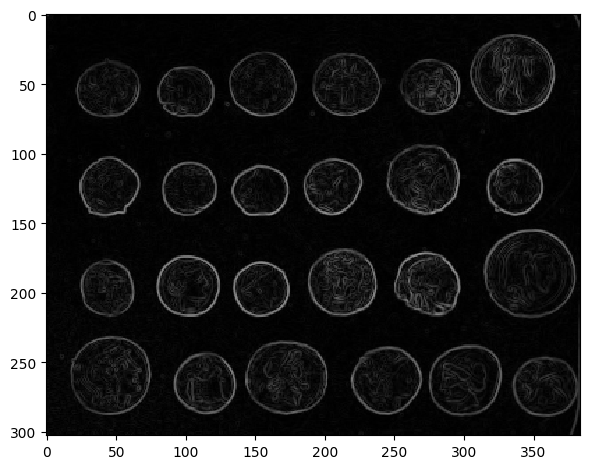

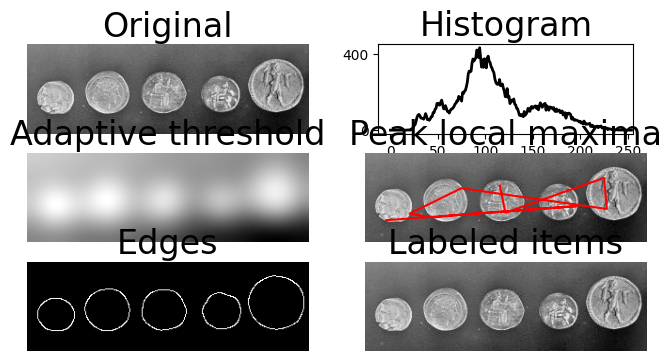

In [31]:
# https://peerj.com/articles/453/ 
# https://scikit-image.org/
# https://peerj.com/articles/453/#fig-1
# pip install -U scikit-image

#%%
#-----------------------------------------------------------------------#
from skimage import (data, io, )
from skimage import filters 
from skimage import feature 
from PIL import ImageFilter

image = data.coins()  # or any NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
#-----------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt

# Load a small section of the image.
image = data.coins()[0:95, 70:370]

fig, axes = plt.subplots(ncols=2, nrows=3,
                         figsize=(8, 4))
ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Original', fontsize=24)
ax0.axis('off')

#-----------------------------------------------------------------------#
# Histogram.
values, bins = np.histogram(image,
                            bins=np.arange(256))

ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0, 400])
ax1.set_aspect(.2)
ax1.set_title('Histogram', fontsize=24)

#-----------------------------------------------------------------------#
# Apply threshold.
from skimage.filters import threshold_local

bw = threshold_local(image, 95, offset=-15)

ax2.imshow(bw, cmap=plt.cm.gray)
ax2.set_title('Adaptive threshold', fontsize=24)
ax2.axis('off')

#-----------------------------------------------------------------------#
# Find maxima.
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

ax3.imshow(image, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:, 1],
         coordinates[:, 0], c='red')
ax3.set_title('Peak local maxima', fontsize=24)
ax3.axis('off')

#-----------------------------------------------------------------------#
# Detect edges.

edges = feature.canny(image, sigma=3,
                     low_threshold=10,
                     high_threshold=80)

ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=24)
ax4.axis('off')

#-----------------------------------------------------------------------#
# Label image regions.
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label

label_image = label(edges)

ax5.imshow(image, cmap=plt.cm.gray)
ax5.set_title('Labeled items', fontsize=24)
ax5.axis('off')

for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bboxfeature
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=2)
    ax5.add_patch(rect)

plt.tight_layout()
plt.show()